In [60]:
from urllib.request import Request,urlopen,urlcleanup
from bs4 import BeautifulSoup
import pickle
import requests
from nltk.tokenize import word_tokenize
import re 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer,FrenchStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import pyLDAvis.gensim as gensimvis
from gensim import corpora, models, similarities
import pyLDAvis
import gensim
from time import sleep
import pandas as pd
import matplotlib.pyplot as plt
from  wordcloud import WordCloud, STOPWORDS 
from textblob import TextBlob
import goslate
from nltk import sent_tokenize
from googletrans import Translator
from pprint import pprint
import textblob


In [17]:
!pip install wordcloud

### Prétraiter les données

In [142]:
df=pd.read_csv("FinalDF.csv",sep=',')

In [2]:
with open ('data', 'rb') as fp:
    data = pickle.load(fp)

In [4]:
data=data.dropna()

In [11]:
data['info'][0][1]

{'name': 'Naouel Rekik',
 'work': ['Work\nSTB'],
 'education': ['Education\nIHEC Carthage\nCollege\nlycée el omrane\nHigh School'],
 'living': ['Places Lived\nCurrent City\nTunis, Tunisia\nHometown\nTunis, Tunisia'],
 'contact': ['Contact Info\nFacebook\n/naouel.rekik.3'],
 'basic': ['Basic Info\nGender\nFemale'],
 'comment': 'Toujours fière de ma Banque'}

In [103]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [104]:
for i in range(len(df)):
    com=[]
    com=df.comments[i].split(',')
    df["comments"][i]=com
    
    

C:\Users\SELON\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## Traduire le text en francais

In [105]:
df2=df.drop([9,18],axis=0).reset_index()

In [106]:
df2.drop(columns=['index'],inplace=True)

In [5]:
data['comments']=[""]*4

C:\Users\SELON\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
str(data['content'][0])

'[\'[\\\'["✅ STB NEO BY STB: Transformation en Banque 4.0💬 C\\\\\\\'est dans un bijou architectural de Tunisie, le Palais du Baron d\\\\\\\'Erlanger encore appelé Ennejma Ezzahra, que l\\\\\\\'inauguration de la première édition d\\\\\\\'un projet national baptisé ′ ′ Neo By STB ′ ′ A eu lieu hier pour passer commande à une banque 4.0. écosystème encore très très connu.\', \'\\\', \\\'", \\\\\\\'peu organisé.\', \'\\\', "# NEOBY #STBLaBanqueEXponentielle #STBBANK #NeoTranslated from FrenchJuillet 10 à 17:07 PM · \\\']"]\']'

In [6]:
df2=data

In [93]:
df2

,content,date,info,good,bad,comments
0,✅ STB NEO BY STB: Transformation to a Bank 4.0...,July 10 at 5:07 PM,"[{'name': 'Raja Mansour Zaabar', 'work': ['Wor...",483,4,
2,STB Bank الشركة التونسية للبنك is in Menzel Te...,July 8 at 1:26 PM,"[{'name': 'Thameur Ben Moussa', 'work': [], 'e...",171,3,
3,تفاعلا معكم و لتغطية احتياجاتكم المالية الاستث...,July 3 at 7:21 PM,"[{'name': 'Zouhayer Bn', 'work': ['Work Facebo...",875,41,
4,Opening times of windows 🏦 Tunisian bank compa...,June 30 at 2:02 PM,"[{'name': 'Chokri La', 'work': [], 'education'...",561,71,


In [7]:
post_final_letters = []
for post in df2["content"]:
    post_final_letters.append(re.sub("[^a-zA-Z]", " ", str(post)))
for i in range(len(df2)):
    df2.content[i]=str(post_final_letters[i])


C:\Users\SELON\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\SELON\Anaconda3\envs\PythonGPU\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\SELON\Anaconda3\envs\PythonGPU\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [142]:
df2.comments[1]

["Apres avoir soudainement coupe le pret, la societe bancaire tunisienne prouve a chaque fois qu'elle ne lui fait plus confiance ... sans ce qu'ils rapportent sur les abus de la part des salaries sauf pour quelques-uns d'entre eux ... Shaker Sfax agence",
 "Nous n'avons pas perdu confiance apres l'avoir appelee la Banque Sociale La jalousie du reste des autres banques a incite la banque centrale stb a telecharger la prime de mars pour que tout le monde soit egal.",
 "Merci d'avoir double le plafond. Veuillez limiter la periode de .... a .......",
 'Pourquoi les prets ont-ils ete deduits pour ceux dont le salaire etait inferieur a 1000 $',
 'Vous avez promis 6 mois',
 'Etc. Banque Ahsen',
 'Prets Aalash Qusaito et nous nous sommes assis sans argent',
 'Le remede pour le pret Qusaito',
 'Quel est le probleme avec Rizzo dans le distributeur automatise de la plupart des banques de Sfax?',
 "Et Dieu est malheureux, et il retire les prets de juillet avec l'Aïd et le peuple, donc la dissoluti

In [14]:
for post in range(len(df2["content"])):
    df2.content[post]=str(df2.content[post]).replace('é','e')
    df2.content[post]=str(df2.content[post]).replace('è','e')
    df2.content[post]=str(df2.content[post]).replace('ê','e')
    df2.content[post]=str(df2.content[post]).replace('à','a')
    for com in range(len(df2.comments[post])):
        df2.comments[post][com]=str(df2.comments[post][com]).replace('é','e')
        df2.comments[post][com]=str(df2.comments[post][com]).replace('è','e')
        df2.comments[post][com]=str(df2.comments[post][com]).replace('ê','e')
        df2.comments[post][com]=str(df2.comments[post][com]).replace('à','a')


C:\Users\SELON\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\SELON\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SELON\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [130]:
df2.comments[0]

['Félicitations si lotfi et bonne continuation',
 'Toujours fière de ma Banque',
 'Félicitations et bravo et bonne continuation si Lotfi',
 'Bon courage',
 'Félicitations et bravo',
 'Félicitations',
 'Félicitations bon courage et bonne continuation',
 'Bravo et bonne continuation',
 'Félicitations',
 'Bon continuation si lotfi']

In [55]:
for j in range(len(df2)):
    post_final_letters[j]=post_final_letters[j].replace('  ',' ')
    post_final_letters[j]=post_final_letters[j].replace('   ',' ')
    post_final_letters[j]=post_final_letters[j].replace('    ',' ')
    post_final_letters[j]=post_final_letters[j].replace('     ',' ')
    post_final_letters[j]=post_final_letters[j].replace('       ',' ')
    post_final_letters[j]=post_final_letters[j].replace('   ',' ')

In [137]:
df2.comments[3]

["La premiere fois que nous sentons que la banque nous a tenus pour responsables des clients Azaz, puis un temps a reporte la deduction, mais a la fin, les espoirs ont ete deçus, jusqu'a ce que nous soyons arrives en juin, si Dieu le veut, pour revoir la decision.",
 "Nous vous invitons a retirer la decision de deduction comme vous l'avez promis aux clients, et cela est documente sur votre page.",
 "J'envoie une lettre de remerciement a la banque tunisienne car c'est mon seul lien apres Dieu ....... Mais au dernier moment je me suis deçu apres avoir deduit le pret de juin 2020 .... J'espere que vous retirez sa decision cadeaux.Je suis a la retraite et j'ai un fils qui passera egalement le baccalaureat. J'ai deux allocations",
 "Je vous demande de vous renseigner sur la raison de votre retraite concernant la non-deduction des acomptes des emprunts verses a ceux dont le revenu depasse mille dinars jusqu'a la fin juillet, et vous avez repris la deduction de l'acompte du mois de juin avant

In [11]:
for i in range(len(df2)):
    df2.content[i]=str(df2.content[i]).lstrip()
    df2.content[i]=str(df2.content[i]).rstrip()
    df2.content[i]=str(df2.content[i]).strip()

C:\Users\SELON\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\SELON\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SELON\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [9]:
df2=df2.reset_index()
df2.drop(columns=['index'],inplace=True)

In [122]:
range(len(df2['info'][1]))

range(0, 10)

In [12]:
for i in range(len(df2)):
    translator = Translator()
    contenu = str(df2["content"][i])
    tokenContenu = sent_tokenize(contenu)    
    newContent=[]
    for tt in tokenContenu:
        print(tt)
        newContent.append(translator.translate(tt, dest="fr").text)
    df2.content[i]=newContent
    
    newComment=[] 
    l=len(df2['info'][i])
    print(l)
    for j in range(0,l):
        commentaire=""
        translator = Translator()

        commentaire = df2['info'][i][j]['comment']

        tokenComment = sent_tokenize(commentaire)
        for tt in tokenComment:
            
            newComment.append(translator.translate(tt, dest="fr").text)
    df2.comments[i]=newComment



STB NEO BY STB  Transformation to a Bank      It was in an architectural jewelry of Tunisia  the Palais du Baron d   Erlanger still called Ennejma Ezzahra  that the inauguration of the first edition of a national project called    Neo By STB    was held yesterday order transformation to a bank          Innovation is not just technological  innovation is first managerial says an expert expert in digital transformation  calling for a deep and collegial reflection  bringing together all the actors of a wide but still very very well known ecosystem  little organized  NEOBY  STBLaBanqueEXponentielle  STBBANK  NeoTranslated from FrenchJuly    at      PM


C:\Users\SELON\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


10


C:\Users\SELON\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


STB Bank الشركة التونسية للبنك is in Menzel Temime.يسرنا اعلامكم ℹانتقال مقر فرع منزل تميم الى مقر وقتي في العنوان التالي:🗺5 نهج منجي سليم منزل تميم ...في انتظار استكمال حلته الجديدة 🆕 بالمقر القديم لاستقباكم في أفضل الظروف🤝 .July 8 at 1:26 PM · Menzel Temime ·
10
تفاعلا معكم و لتغطية احتياجاتكم المالية الاستثنائية في هذه الفترة, الشركة التونسية للبنك تقرر:✅تمديد صلوحية بطاقة VISA 💳 المنتهية في شهر جوان.✅رفع قيمة السقف المسموح به 🔼(Plafond) لكل البطاقات البنكية الى الضعف ✖2⃣✅مضاعفة✖2⃣ قيمة التداين القصوى المسموح بها🔺( Montant de decouvert autorise )STB BANK 🤝ديما معاكم و ما تخليهاش بيكمJuly 3 at 7:21 PM ·
10
Opening times of windows 🏦 Tunisian bank company during the summer 🏖🌞Opening hours 🕣🕐 Monday to Friday:′′ Working hours ⚙ ′′ remote apps 📱💻 24 all the time and every time ↖#STBNet #STBDirect #DigitalBankTranslated from ArabicJune 30 at 2:02 PM ·
10


In [146]:
df2.content[3]

"['Horaires d ouverture des fenetres   Societe bancaire tunisienne pendant l ete    Heures d ouverture    Du lundi au vendredi      Heures de travail       Applications distantes       a tout moment et a chaque fois     STBNet  STBDirect  DigitalBankTranslated from Arabic    juin a   h']"

In [139]:
for i in range(len(df2)):
    df2.content[i][0]=re.sub('[/,\,?,!,<,>,«,»]',"",df2.content[i][0])
    for j in range(len(df2.comments[i])):
        df2.comments[i][j]=re.sub('[/,\,?,!,<,>,«,»]',"",df2.comments[i][j])

<>:2: DeprecationWarning: invalid escape sequence \,
<>:2: DeprecationWarning: invalid escape sequence \,
<>:2: DeprecationWarning: invalid escape sequence \,
<ipython-input-139-bf5b9a7f1aa8>:2: DeprecationWarning: invalid escape sequence \,
  df2.content[i][0]=re.sub('[/,\,?,!,<,>,«,»]',"",df2.content[i][0])


In [140]:
df2.to_csv('cleanDF_fr.csv')

In [9]:
for i in range(len(df2)):
    df2.content[i]=str(df2.content[i]).replace("è","e")
    df2.content[i]=str(df2.content[i]).replace("é","e")
    df2.content[i]=str(df2.content[i]).replace("ê","e")
    #df2.content[i]=str(df2.content[i]).replace("à","a")
    df2.content[i]=str(df2.content[i]).replace("ô","o")
    for j in range(len(df2.comments[i])):            
        df2.comments[i]=str(df2.comments[i]).replace("è","e")
        df2.comments[i]=str(df2.comments[i]).replace("é","e")
        df2.comments[i]=str(df2.comments[i]).replace("ê","e")
        #df2.comments[i]=str(df2.comments[i]).replace("à","a")
        df2.comments[i]=str(df2.comments[i]).replace("ô","o")

C:\Users\SELON\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\SELON\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SELON\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [752]:
df2.comments

0     ["[«La carte bancaire n'a pas ete etendue, com...
1     ["['Apres la suppression brutale du prêt, la s...
2     ["['Bonne chance a toutes et a tous'", "'Bonne...
3     ['["Elle se dirige vers le menuisier. Le conse...
4     ["['Merci ma banque je souhaite a tous bonne c...
5     ["['Oh stb bank, mon frere, c'est vrai pour Ba...
6     ["['BRAVO si lotfi et bonne continuation Chef'...
7     ['"Il n\'y a aucune possibilite pour nous qui ...
8     ['[«Carte Visa Stb perdue en presence»', '"Par...
9     ['["Par Dieu, le fait de reporter le versement...
10    ["[«Notre travail est une exigence et nous l'a...
11    ["['toujours sur le bon chemin bonne continuat...
12    ["['Merci et vive notre deuxieme mere la s t b...
13    ["['Nous pouvons le demander pendant que je su...
14    ['["Bonne annee et joyeux Eid a tous .... Et u...
15    ["['Chaque annee, vous êtes pure, heureuse, av...
16    ["['Toujours la societe tunisienne de la banqu...
17    ["['Vous vous ressemblez!'", 'De même, not

In [10]:
df2.to_csv("newdf2.csv")

In [986]:
datafr=df2

In [141]:
df2.comments[0]

['[Honnêtement linutilité est de rembourser ces deux mois de prêts.',
 '"Et le prêt Eid vaut 1 000 dinars pour les clients ce nest pas étrange pour vous"',
 'Pourquoi des prêts ont-ils été déduits pour ceux dont le salaire est inférieur à 1 000 d.',
 'Tu as promis 6 mois.',
 '"La carte parle-t-elle toujours en double salaire ou non"',
 '"Jai obtenu le prêt deux fois ce mois   "',
 '"Nous avons toujours le droit de promouvoir ou non"',
 'Ça fait 2 semaine que j essaye de vous joindre par téléphone mais pas de réponse.',
 'Pouvez vous me dire comment clôturer un ancien compte courant',
 '"Je suis le gardien personne comme vous naime à Rouge ils ont commencé le problème."',
 'Frère de quoi parle lhistoire et a vu un membre de la robe frère avez-vous entendu ',
 'Nous vous avons expliqué que vous en aviez parlé à Double Slayer à Rogel et que votre temps est décédé alors vous avez réussi mais plutôt promis et payé pour son image.',
 '"Les taxes sont compensées par TMM. La taxe est gratuite.

In [16]:
df2.comments[0]

['Felicitations si lotfi et bonne continuation',
 'Toujours fiere de ma Banque',
 'Felicitations et bravo et bonne continuation si Lotfi',
 'Bon courage',
 'Felicitations et bravo',
 'Felicitations',
 'Felicitations bon courage et bonne continuation',
 'Bravo et bonne continuation',
 'Felicitations',
 'Bon continuation si lotfi']

In [15]:
for i in range(len(df2.comments)):
    df2.comments[i]=list(df2.comments[i].split(','))

AttributeError: 'list' object has no attribute 'split'

In [17]:
post_final_letters = []
for post in df2["content"]:
    post_final_letters.append(re.sub("[^a-zA-Z]", " ", str(post)))


In [480]:
post_final_letters

['  Neo by STB  Theme  Tourisme en transformation   Le    juillet      au palais du Baron d  Erlanger  Ennejma Ezzahra   ', '  Nous sommes heureux de vous informer que le siege de la succursale de Manzil Tamim a demenage dans mon siege provisoire a l adresse suivante    Manji Salim approche Manzil Tamim     en attendant la finalisation de sa nouvelle solution dans l ancien siege pour vous rencontrer dans les meilleures conditions   ', '  Bon courage  a nos bacheliers            La confiance en soi est le premier secret du succes      R  W  Emerson  ', '  Interagissez avec vous et pour couvrir vos besoins financiers exceptionnels pendant cette periode  la banque tunisienne decide  de prolonger la validite de la carte VISA fin juin       Montant de decouvert autorise    ', '  Nous souhaitons a nos eleves tout le succes aux concours        bonne chance  ', '  Confus quant au salut de votre service sur vous avec la carte des entreprises STB C Pay   rendez les plus faciles et faites les pla

In [18]:
comment_final_letters = []
for comment in df2["comments"]:
    comment_letters=[]
    for j in range(len(comment)):
        comment_letters.append(re.sub("[^a-zA-Z]", " ", str(comment[j])))
    comment_final_letters.append(comment_letters)

In [150]:
type(comment_final_letters)

list

In [174]:
import itertools
fin=list(itertools.chain.from_iterable(comment_final_letters))

In [19]:
new=[]
for i in range(len(comment_final_letters)):
    for j in range(len(comment_final_letters[i])):
        new.append(comment_final_letters[i][j])

In [146]:
type(new)

list

## Tokenization

### comments

In [20]:
tokenized_docs = [word_tokenize(doc) for doc in new]

In [153]:
tokenized_docs

[['Felicitations', 'si', 'lotfi', 'et', 'bonne', 'continuation'],
 ['Toujours', 'fiere', 'de', 'ma', 'Banque'],
 ['Felicitations',
  'et',
  'bravo',
  'et',
  'bonne',
  'continuation',
  'si',
  'Lotfi'],
 ['Bon', 'courage'],
 ['Felicitations', 'et', 'bravo'],
 ['Felicitations'],
 ['Felicitations', 'bon', 'courage', 'et', 'bonne', 'continuation'],
 ['Bravo', 'et', 'bonne', 'continuation'],
 ['Felicitations'],
 ['Bon', 'continuation', 'si', 'lotfi'],
 ['Apres',
  'avoir',
  'soudainement',
  'coupe',
  'le',
  'pret',
  'la',
  'societe',
  'bancaire',
  'tunisienne',
  'prouve',
  'a',
  'chaque',
  'fois',
  'qu',
  'elle',
  'ne',
  'lui',
  'fait',
  'plus',
  'confiance',
  'sans',
  'ce',
  'qu',
  'ils',
  'rapportent',
  'sur',
  'les',
  'abus',
  'de',
  'la',
  'part',
  'des',
  'salaries',
  'sauf',
  'pour',
  'quelques',
  'uns',
  'd',
  'entre',
  'eux',
  'Shaker',
  'Sfax',
  'agence'],
 ['Nous',
  'n',
  'avons',
  'pas',
  'perdu',
  'confiance',
  'apres',
  'l',

### posts

In [21]:
tokenized_docs2 = [word_tokenize(doc) for doc in post_final_letters]

In [997]:
tokenized_docs2

[['Neo', 'by', 'STB', 'Theme', 'Tourisme', 'en', 'transformation', 'Le', 'juillet', 'au', 'palais', 'du', 'Baron', 'd', 'Erlanger', 'Ennejma', 'Ezzahra'], ['Nous', 'sommes', 'heureux', 'de', 'vous', 'informer', 'que', 'le', 'siege', 'de', 'la', 'succursale', 'de', 'Manzil', 'Tamim', 'a', 'demenage', 'mon', 'siege', 'provisoire', 'l', 'adresse', 'suivante', 'Manji', 'Salim', 'approche', 'Manzil', 'Tamim', 'en', 'attendant', 'la', 'finalisation', 'de', 'sa', 'nouvelle', 'solution', 'dans', 'l', 'ancien', 'siege', 'pour', 'vous', 'rencontrer', 'dans', 'les', 'meilleures', 'conditions'], ['Bon', 'courage', 'nos', 'bacheliers', 'La', 'confiance', 'en', 'soi', 'est', 'le', 'premier', 'secret', 'du', 'succes', 'R', 'W', 'Emerson'], ['Interagissez', 'avec', 'vous', 'et', 'pour', 'couvrir', 'vos', 'besoins', 'financiers', 'exceptionnels', 'durant', 'cette', 'periode', 'la', 'societe', 'bancaire', 'tunisienne', 'decide', 'de', 'prolonger', 'la', 'validite', 'de', 'la', 'carte', 'VISA', 'fin', 'j

## Transformer les mots en minuscules

### comments

In [22]:
miniscules = []
for word in tokenized_docs:
    m = []
    for w in word:
        m.append(w.lower())
    miniscules.append(m)

In [737]:
miniscules

[['la', 'carte', 'bancaire', 'n', 'a', 'pas', 'ete', 'etendue'], ['comme', 'vous', 'l', 'avez', 'dit'], ['apres', 'la', 'suppression', 'brutale', 'du', 'pr', 't'], ['la', 'societe', 'tunisienne', 'de', 'la', 'banque', 'prouve', 'a', 'chaque', 'fois', 'que', 'les', 'clients', 'ne', 'lui', 'font', 'plus', 'confiance', 'sans', 'ce', 'qui', 'a', 'ete', 'rapporte', 'par', 'les', 'salaries'], ['a', 'l', 'exception', 'de', 'quelques', 'uns', 'agence', 'shaker', 'sfax'], ['nous', 'n', 'avons', 'pas', 'perdu', 'confiance', 'apres', 'que', 'je', 'l', 'appelle', 'la', 'banque', 'sociale'], ['l', 'autre', 'jalousie', 'des', 'autres', 'banques', 'qui', 'a', 'incite', 'la', 'banque', 'centrale', 'stb', 'a', 'telecharger', 'la', 'prime', 'de', 'mars', 'pour', 'que', 'tout', 'le', 'monde', 'soit', 'egal'], ['merci', 'd', 'avoir', 'ajoute', 'le', 'plafond'], ['mais', 'veuillez', 'preciser', 'la', 'periode', 'du', 'au'], ['par', 'dieu'], ['il', 'est', 'regrettable', 'qu', 'ils', 'aient', 'coupe', 'les',

### posts

In [23]:
miniscules2 = []
for word in tokenized_docs2:
    m = []
    for w in word:
        m.append(w.lower())
    miniscules2.append(m)

## Enlever les stopwords

### comments

In [24]:
from nltk.corpus import stopwords
tokenized_docs_no_stopwords = []
for doc in miniscules:
    new_term_vector = []
    for word in doc:
        if not word in stopwords.words('french'):
            new_term_vector.append(word)
    
    tokenized_docs_no_stopwords.append(new_term_vector)

In [703]:
tokenized_docs_no_stopwords

[['carte', 'bancaire', 'a', 'ete', 'etendue'], ['comme', 'dit'], ['apres', 'suppression', 'brutale', 'pr'], ['societe', 'tunisienne', 'banque', 'prouve', 'a', 'chaque', 'fois', 'clients', 'font', 'plus', 'confiance', 'sans', 'a', 'ete', 'rapporte', 'salaries'], ['a', 'exception', 'quelques', 'uns', 'agence', 'shaker', 'sfax'], ['perdu', 'confiance', 'apres', 'appelle', 'banque', 'sociale'], ['autre', 'jalousie', 'autres', 'banques', 'a', 'incite', 'banque', 'centrale', 'stb', 'a', 'telecharger', 'prime', 'mars', 'tout', 'monde', 'egal'], ['merci', 'avoir', 'ajoute', 'plafond'], ['veuillez', 'preciser', 'periode'], ['dieu'], ['regrettable', 'coupe', 'pr', 'ts', 'a', 'peuple'], ['donc', 'necessaire', 'resoudre'], ['quel', 'probleme', 'rizzo', 'chez', 'concessionnaire', 'automatique'], ['majorite', 'banques', 'sfax'], ['pourquoi', 'pr', 'ts', 'ete', 'deduits', 'ceux', 'dont', 'salaire', 'inferieur', 'a'], ['promis', 'mois'], ['pr', 'ts', 'allash'], ['bonne', 'chance', 'a', 'toutes', 'a', 

### posts

In [25]:
from nltk.corpus import stopwords
tokenized_docs_no_stopwords2 = []
for doc in miniscules2:
    new_term_vector2 = []
    for word in doc:
        if not word in stopwords.words('french'):
            new_term_vector2.append(word)
    
    tokenized_docs_no_stopwords2.append(new_term_vector2)

## Appliquer la lemmatisation et le stemming

In [30]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SELON\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### comments

In [26]:
snowball = FrenchStemmer()
wordnet = WordNetLemmatizer()
def lemmatize_stemming(text):
    return snowball.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
preprocessed_docs = []

for doc in tokenized_docs_no_stopwords:
    final_doc = []
    for word in doc:
        final_doc.append(lemmatize_stemming(word))
    
    preprocessed_docs.append(final_doc)

In [844]:
preprocessed_docs

[['cart', 'bancair', 'a', 'ete', 'etendu'], ['comm', 'dit'], ['apre', 'suppress', 'brutal', 'pr'], ['societ', 'tunisien', 'banqu', 'prouv', 'a', 'chaqu', 'fois', 'client', 'font', 'plus', 'confianc', 'san', 'a', 'ete', 'rapport', 'salar'], ['a', 'except', 'quelqu', 'un', 'agenc', 'shak', 'sfax'], ['perdu', 'confianc', 'apre', 'appel', 'banqu', 'social'], ['autr', 'jalous', 'autr', 'banqu', 'a', 'incit', 'banqu', 'central', 'stb', 'a', 'telecharg', 'prim', 'mar', 'tout', 'mond', 'egal'], ['merc', 'avoir', 'ajout', 'plafond'], ['veuill', 'precis', 'period'], ['dieu'], ['regret', 'coup', 'pr', 't', 'a', 'peupl'], ['donc', 'necessair', 'resoudr'], ['quel', 'problem', 'rizzo', 'chez', 'concessionnair', 'automat'], ['majorit', 'banqu', 'sfax'], ['pourquoi', 'pr', 't', 'ete', 'deduit', 'ceux', 'dont', 'salair', 'inferieur', 'a'], ['prom', 'mois'], ['pr', 't', 'allash'], ['bon', 'chanc', 'a', 'tout', 'a', 'tous'], ['bon', 'chanc', 'a', 'tous', 'bacheli'], ['bon', 'chanc', 'bacheli'], ['bon', '

### posts

In [27]:
snowball = FrenchStemmer()
wordnet = WordNetLemmatizer()
def lemmatize_stemming2(text):
    return snowball.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
preprocessed_docs2 = []

for doc in tokenized_docs_no_stopwords2:
    final_doc2 = []
    for word in doc:
        final_doc2.append(lemmatize_stemming2(word))
    
    preprocessed_docs2.append(final_doc2)

In [804]:
df2.comments[0]

'["[«La carte bancaire n\'a pas ete etendue'

In [51]:
df3=df2

In [606]:
comment

" ['apre', 'abolit', 'brutal', 'pr'] ['societ', 'tunisien', 'banqu', 'prouv', 'a', 'chaqu', 'fois', 'client', 'font', 'plus', 'confianc', 'san', 'parl', 'abus', 'part', 'salar', 'sauf', 'quelqu', 'un', 'agenc', 'shak', 'sfax'] ['perdu', 'confianc', 'apre', 'appel', 'banqu', 'social'] ['autr', 'jalous', 'autr', 'banqu', 'a', 'pouss', 'banqu', 'central', 'stb', 'a', 'telecharg', 'prim', 'mar', 'tout', 'mond', 'egal'] ['merc', 'avoir', 'ajout', 'plafond'] ['veuill', 'precis', 'period'] ['dieu'] ['regret', 'coup', 'pr', 't', 'a', 'peupl'] ['donc', 'necessair', 'resoudr'] ['quel', 'problem', 'rizzo', 'chez', 'concessionnair', 'automat'] ['majorit', 'banqu', 'sfax'] ['pourquoi', 'pr', 't', 'ete', 'deduit', 'ceux', 'dont', 'salair', 'inferieur', 'a'] ['prom', 'mois'] ['pr', 't', 'allash'] ['apre', 'abolit', 'brutal', 'pr'] ['societ', 'tunisien', 'banqu', 'prouv', 'a', 'chaqu', 'fois', 'client', 'font', 'plus', 'confianc', 'san', 'parl', 'abus', 'part', 'salar', 'sauf', 'quelqu', 'un', 'agenc'

In [35]:
preprocessed_docs

[[],
 [],
 [],
 [],
 ['h'],
 ['o'],
 [],
 [],
 ['e'],
 [],
 ['e'],
 [],
 ['e'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['i'],
 [],
 ['u'],
 [],
 ['i'],
 [],
 ['i'],
 [],
 ['e'],
 [],
 ['e'],
 [],
 [],
 [],
 [],
 ['e'],
 [],
 ['r'],
 ['e'],
 [],
 ['b'],
 ['o'],
 ['u'],
 ['r'],
 [],
 ['e'],
 ['r'],
 [],
 [],
 ['e'],
 [],
 [],
 [],
 ['e'],
 ['u'],
 ['x'],
 [],
 [],
 ['o'],
 ['i'],
 [],
 [],
 [],
 ['e'],
 [],
 ['p'],
 ['r'],
 ['e'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['e'],
 [],
 [],
 [],
 ['e'],
 [],
 ['p'],
 ['r'],
 ['e'],
 [],
 [],
 ['e'],
 ['i'],
 [],
 [],
 ['v'],
 ['a'],
 ['u'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['i'],
 [],
 ['a'],
 ['r'],
 [],
 [],
 ['p'],
 ['o'],
 ['u'],
 ['r'],
 [],
 [],
 ['e'],
 [],
 [],
 [],
 [],
 ['i'],
 ['e'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['e'],
 [],
 [],
 [],
 [],
 ['e'],
 [],
 [],
 [],
 ['p'],
 ['a'],
 [],
 [],
 ['e'],
 [],
 ['r'],
 ['a'],
 [],
 ['g'],
 ['e'],
 [],
 ['p'],
 ['o'],
 ['u'],
 ['r'],
 [],
 ['v'],
 ['o'],
 ['u'],
 [],
 [],
 [],
 [

In [28]:
#df3.comments=[]
df3=df2
ll=[]
p=0
for i in range(len(df2.comments)):    
    l=[]
    for j in range(len(df2.comments[i])):
        df3.comments[i][j]=(preprocessed_docs[p+j])  
        print(p+j)
    p+=len(df2.comments[i])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44


In [29]:
comment=""
for i in range(len(df3)):
    for j in df3['comments'][i]:
        comment+=" "+str(j)

In [1006]:
len(preprocessed_docs)

561

In [859]:
df3.comments[2]

[['bon', 'chanc', 'a', 'tout', 'a', 'tous'], ['bon', 'chanc', 'a', 'tous', 'bacheli'], ['bon', 'chanc', 'bacheli'], ['bon', 'chanc'], ['allah'], ['dieu', 'accord', 'succ', 'a', 'tous', 'enfant'], ['revenus', 'mois', 'joan', 'qass'], ['pr'], ['bon', 'chanc', 'a', 'tous', 'etudi', 'baccalaureat'], ['seigneur'], ['bon', 'chanc', 'a', 'tous'], ['proprietair', 'histoir', 'pr'], ['seigneur'], ['amin', 'bon', 'chanc'], ['retour', 'a'], ['meilleur', 'choos', 'puiss', 'fair', 'reven'], ['bon', 'mois', 'joan', 'hah'], ['reven', 'retribu', 'pr'], ['bon', 'chanc', 'a', 'tous', 'etudi'], ['avant', 'plaindr'], ['a', 'tigr', 'man', 'cours']]

In [709]:
preprocessed_docs

[['cart', 'bancair', 'a', 'ete', 'etendu'], ['comm', 'dit'], ['apre', 'suppress', 'brutal', 'pr'], ['societ', 'tunisien', 'banqu', 'prouv', 'a', 'chaqu', 'fois', 'client', 'font', 'plus', 'confianc', 'san', 'a', 'ete', 'rapport', 'salar'], ['a', 'except', 'quelqu', 'un', 'agenc', 'shak', 'sfax'], ['perdu', 'confianc', 'apre', 'appel', 'banqu', 'social'], ['autr', 'jalous', 'autr', 'banqu', 'a', 'incit', 'banqu', 'central', 'stb', 'a', 'telecharg', 'prim', 'mar', 'tout', 'mond', 'egal'], ['merc', 'avoir', 'ajout', 'plafond'], ['veuill', 'precis', 'period'], ['dieu'], ['regret', 'coup', 'pr', 't', 'a', 'peupl'], ['donc', 'necessair', 'resoudr'], ['quel', 'problem', 'rizzo', 'chez', 'concessionnair', 'automat'], ['majorit', 'banqu', 'sfax'], ['pourquoi', 'pr', 't', 'ete', 'deduit', 'ceux', 'dont', 'salair', 'inferieur', 'a'], ['prom', 'mois'], ['pr', 't', 'allash'], ['bon', 'chanc', 'a', 'tout', 'a', 'tous'], ['bon', 'chanc', 'a', 'tous', 'bacheli'], ['bon', 'chanc', 'bacheli'], ['bon', '

# wordcloud

### WordCloud des commentaires

In [30]:
stopwords = set(STOPWORDS) 

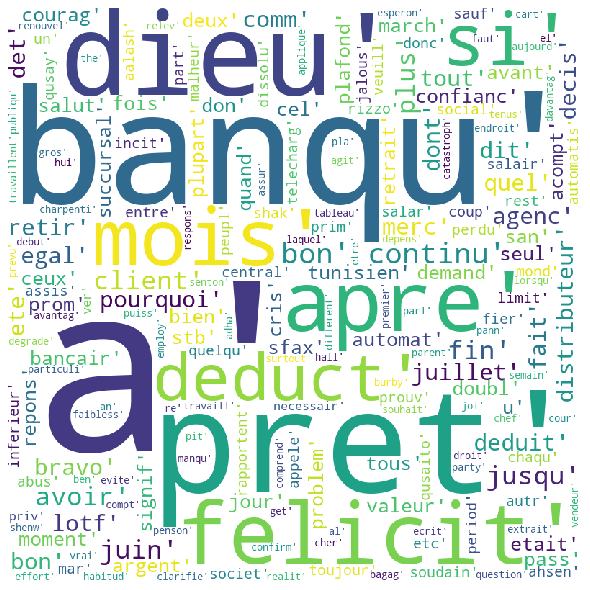

In [31]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### WordCloud des posts

In [32]:
#df3.comments=[]
df3=df2
ll=[]
p=0
for i in range(len(df2.content)):    
    l=[]
    df3.content[i]=(preprocessed_docs2[i])

C:\Users\SELON\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [33]:
posts=""
#for i in range(len(df3)):
for j in df3['content']:
    posts+=" "+str(j)

In [34]:
stopwords2 = set(STOPWORDS) 

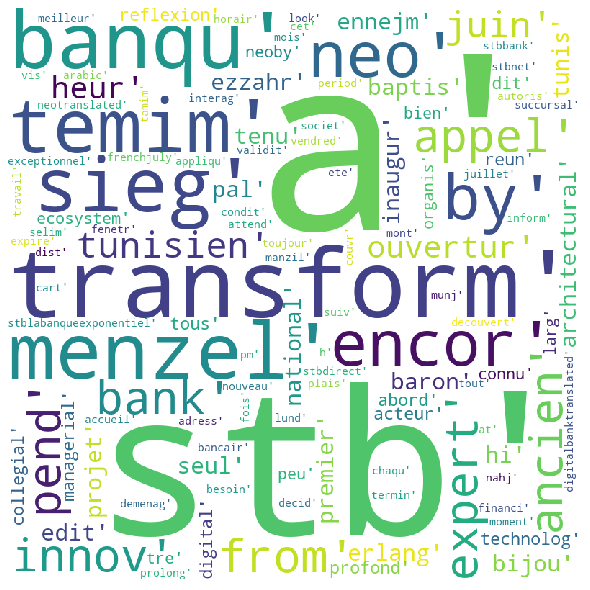

In [35]:
wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords2, 
                min_font_size = 10).generate(posts) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud2) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### good vs bad reacts

In [36]:
good=0
bad=0
for i in range(len(df3)):
    good+=df3.good[i]
    
    bad+=df3.bad[i]
print(good)
print(bad)

2090
119


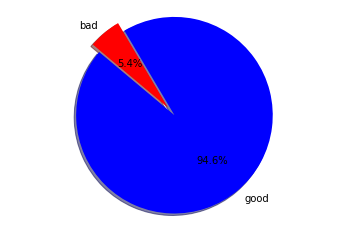

In [37]:
# Data to plot
labels = 'good','bad'
sizes = [good,bad]
colors = ['blue', 'red']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [916]:
dictionary = gensim.corpora.Dictionary(preprocessed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 a
1 bancair
2 cart
3 ete
4 etendu
5 comm
6 dit
7 apre
8 brutal
9 pret
10 suppress


client


In [917]:
bow_corpus = [dictionary.doc2bow(doc) for doc in preprocessed_docs]

In [611]:
bow_corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(5, 1), (6, 1)], [(7, 1), (8, 1), (9, 1), (10, 1)], [(0, 2), (3, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)], [(0, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)], [(7, 1), (11, 1), (14, 1), (30, 1), (31, 1), (32, 1)], [(0, 2), (11, 2), (33, 2), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1)], [(44, 1), (45, 1), (46, 1), (47, 1)], [(48, 1), (49, 1), (50, 1)], [(51, 1)], [(0, 1), (9, 1), (52, 1), (53, 1), (54, 1), (55, 1)], [(56, 1), (57, 1), (58, 1)], [(59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1)], [(11, 1), (27, 1), (65, 1)], [(0, 1), (3, 1), (9, 1), (55, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1)], [(72, 1), (73, 1)], [(9, 1), (55, 1), (74, 1)], [(0, 2), (43, 1), (75, 1), (76, 1), (77, 1)], [(0, 1), (75, 1), (76, 1), (77, 1), (78, 1)], [(75, 1), (76, 1), (78, 1)], [(75, 1), (76, 1)], [(79, 1)

## TF IDF

In [918]:
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [919]:
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.18337307964027882),
 (1, 0.45711261940867326),
 (2, 0.4044930767885512),
 (3, 0.35780464196520867),
 (4, 0.6824833740530692)]


## LDA bow corpus

In [920]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [921]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.045*"a" + 0.031*"mois" + 0.020*"client" + 0.020*"pret" + 0.017*"banqu" + 0.017*"tunisien" + 0.016*"agenc" + 0.015*"toujour" + 0.012*"societ" + 0.010*"don"
Topic: 1 
Words: 0.045*"a" + 0.037*"mois" + 0.030*"anne" + 0.023*"bon" + 0.019*"pret" + 0.018*"chaqu" + 0.016*"tous" + 0.014*"si" + 0.014*"succursal" + 0.014*"banqu"
Topic: 2 
Words: 0.059*"pret" + 0.029*"mois" + 0.029*"bon" + 0.015*"a" + 0.014*"mar" + 0.013*"dit" + 0.013*"chanc" + 0.013*"juin" + 0.012*"roug" + 0.011*"quel"
Topic: 3 
Words: 0.024*"a" + 0.020*"succursal" + 0.019*"dieu" + 0.015*"accord" + 0.015*"succ" + 0.009*"client" + 0.009*"veuill" + 0.009*"distributeur" + 0.009*"plus" + 0.009*"fait"
Topic: 4 
Words: 0.039*"banqu" + 0.036*"a" + 0.025*"dieu" + 0.020*"bon" + 0.019*"pret" + 0.017*"merc" + 0.013*"seigneur" + 0.013*"succursal" + 0.013*"ben" + 0.013*"mois"
Topic: 5 
Words: 0.056*"a" + 0.044*"bon" + 0.022*"chanc" + 0.020*"tous" + 0.017*"salut" + 0.014*"fait" + 0.012*"bien" + 0.012*"branch" + 0.012*"tre" 

## LDA TF IDF

In [922]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.023*"chaqu" + 0.020*"bash" + 0.020*"anne" + 0.016*"eid" + 0.010*"plus" + 0.009*"mois" + 0.009*"fait" + 0.009*"bienheur" + 0.009*"enfant" + 0.009*"aujourd"
Topic: 1 Word: 0.027*"si" + 0.019*"veut" + 0.017*"a" + 0.014*"dieu" + 0.012*"bank" + 0.011*"salut" + 0.010*"retour" + 0.008*"pret" + 0.008*"branch" + 0.007*"fait"
Topic: 2 Word: 0.021*"frer" + 0.021*"felicit" + 0.018*"dit" + 0.010*"banqu" + 0.009*"tunisien" + 0.009*"mois" + 0.009*"succursal" + 0.008*"remerc" + 0.007*"accept" + 0.007*"bien"
Topic: 3 Word: 0.020*"mois" + 0.014*"anne" + 0.012*"pret" + 0.011*"mar" + 0.011*"aim" + 0.010*"bon" + 0.009*"cas" + 0.009*"mond" + 0.007*"tout" + 0.007*"banqu"
Topic: 4 Word: 0.024*"tunisien" + 0.019*"effort" + 0.018*"societ" + 0.010*"merc" + 0.009*"bancair" + 0.009*"o" + 0.008*"vis" + 0.008*"install" + 0.007*"lotf" + 0.007*"banqu"
Topic: 5 Word: 0.019*"bon" + 0.017*"toujour" + 0.013*"franch" + 0.012*"continu" + 0.012*"ete" + 0.011*"allash" + 0.011*"fet" + 0.010*"juin" + 0.009*"pre

## evaluation bow corpus

In [923]:
for index, score in sorted(lda_model[bow_corpus[1]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.6999633312225342	 
Topic: 0.059*"pret" + 0.029*"mois" + 0.029*"bon" + 0.015*"a" + 0.014*"mar" + 0.013*"dit" + 0.013*"chanc" + 0.013*"juin" + 0.012*"roug" + 0.011*"quel"

Score: 0.03335441276431084	 
Topic: 0.077*"stb" + 0.050*"bravo" + 0.032*"dit" + 0.026*"pret" + 0.018*"a" + 0.017*"plus" + 0.015*"mois" + 0.014*"tout" + 0.009*"remerc" + 0.009*"bank"

Score: 0.03333793208003044	 
Topic: 0.045*"a" + 0.037*"mois" + 0.030*"anne" + 0.023*"bon" + 0.019*"pret" + 0.018*"chaqu" + 0.016*"tous" + 0.014*"si" + 0.014*"succursal" + 0.014*"banqu"

Score: 0.03333674371242523	 
Topic: 0.039*"banqu" + 0.036*"a" + 0.025*"dieu" + 0.020*"bon" + 0.019*"pret" + 0.017*"merc" + 0.013*"seigneur" + 0.013*"succursal" + 0.013*"ben" + 0.013*"mois"

Score: 0.03333653509616852	 
Topic: 0.054*"dieu" + 0.029*"a" + 0.026*"plus" + 0.022*"pret" + 0.019*"veut" + 0.019*"si" + 0.013*"stb" + 0.010*"autr" + 0.010*"branch" + 0.010*"w"

Score: 0.03333496302366257	 
Topic: 0.056*"a" + 0.044*"bon" + 0.022*"chanc" + 0.020

## Evaluation tf idf

In [924]:
for index, score in sorted(lda_model_tfidf[bow_corpus[1]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.699927806854248	 
Topic: 0.013*"excellent" + 0.012*"pla" + 0.010*"a" + 0.010*"amen" + 0.009*"comm" + 0.008*"merc" + 0.008*"doubl" + 0.008*"entre" + 0.007*"beaucoup" + 0.007*"al"

Score: 0.03336627781391144	 
Topic: 0.021*"frer" + 0.021*"felicit" + 0.018*"dit" + 0.010*"banqu" + 0.009*"tunisien" + 0.009*"mois" + 0.009*"succursal" + 0.008*"remerc" + 0.007*"accept" + 0.007*"bien"

Score: 0.033346060663461685	 
Topic: 0.057*"seigneur" + 0.015*"meilleur" + 0.014*"a" + 0.014*"banqu" + 0.011*"oh" + 0.011*"gagn" + 0.010*"mois" + 0.009*"succursal" + 0.009*"bonjour" + 0.009*"aid"

Score: 0.033344075083732605	 
Topic: 0.027*"si" + 0.019*"veut" + 0.017*"a" + 0.014*"dieu" + 0.012*"bank" + 0.011*"salut" + 0.010*"retour" + 0.008*"pret" + 0.008*"branch" + 0.007*"fait"

Score: 0.03334246575832367	 
Topic: 0.020*"mois" + 0.014*"anne" + 0.012*"pret" + 0.011*"mar" + 0.011*"aim" + 0.010*"bon" + 0.009*"cas" + 0.009*"mond" + 0.007*"tout" + 0.007*"banqu"

Score: 0.033335551619529724	 
Topic: 0.024*"t

## Frequence de distribution

In [38]:
cm=list(comment.split(','))

In [39]:
for c in range(len(cm)):
    cm[c]=cm[c].replace('[','')
    cm[c]=cm[c].replace(']','')
    cm[c]=cm[c].replace("'",'')

In [40]:
cm

[' felicit',
 ' si',
 ' lotf',
 ' bon',
 ' continu toujour',
 ' fier',
 ' banqu felicit',
 ' bravo',
 ' bon',
 ' continu',
 ' si',
 ' lotf bon',
 ' courag felicit',
 ' bravo felicit felicit',
 ' bon',
 ' courag',
 ' bon',
 ' continu bravo',
 ' bon',
 ' continu felicit bon',
 ' continu',
 ' si',
 ' lotf apre',
 ' avoir',
 ' soudain',
 ' coup',
 ' pret',
 ' societ',
 ' bancair',
 ' tunisien',
 ' prouv',
 ' a',
 ' chaqu',
 ' fois',
 ' fait',
 ' plus',
 ' confianc',
 ' san',
 ' rapportent',
 ' abus',
 ' part',
 ' salar',
 ' sauf',
 ' quelqu',
 ' un',
 ' entre',
 ' shak',
 ' sfax',
 ' agenc perdu',
 ' confianc',
 ' apre',
 ' avoir',
 ' appele',
 ' banqu',
 ' social',
 ' jalous',
 ' rest',
 ' autr',
 ' banqu',
 ' a',
 ' incit',
 ' banqu',
 ' central',
 ' stb',
 ' a',
 ' telecharg',
 ' prim',
 ' mar',
 ' tout',
 ' mond',
 ' egal merc',
 ' avoir',
 ' doubl',
 ' plafond',
 ' veuill',
 ' limit',
 ' period',
 ' a pourquoi',
 ' pret',
 ' ete',
 ' deduit',
 ' ceux',
 ' dont',
 ' salair',
 ' etait',

In [41]:
from nltk.probability import FreqDist
fdist = FreqDist(cm)
print(fdist)

<FreqDist with 287 samples and 431 outcomes>


In [42]:
fdist.most_common(10)

[(' a', 32),
 (' banqu', 12),
 (' pret', 9),
 (' bon', 6),
 (' si', 5),
 (' dieu', 5),
 (' deduct', 5),
 (' avoir', 4),
 (' apre', 4),
 (' fin', 4)]

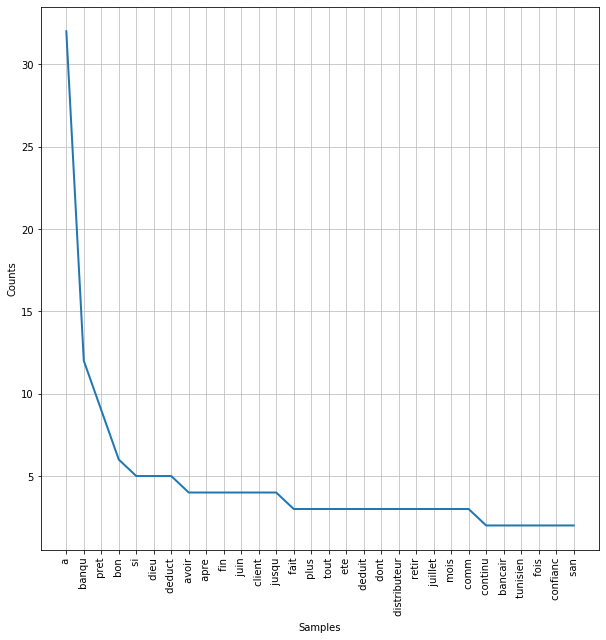

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
fdist.plot(30,cumulative=False)
plt.show()

In [871]:
vis_data = gensimvis.prepare(lda_model, bow_corpus, dictionary,sort_topics=False)

pyLDAvis.display(vis_data)

C:\Users\SELON\Anaconda3\envs\PythonGPU\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


## analyse d'opinion

In [54]:
analyse=[]
for i in range(len(df3)):
    c=""
    for j in range(len(df3['comments'][i])):
        for k in range(len(df3.comments[i][j])):
            c+=" "+str(j)
            analyse.append(df3.comments[i][j][k])

In [83]:
len(analyse)

474

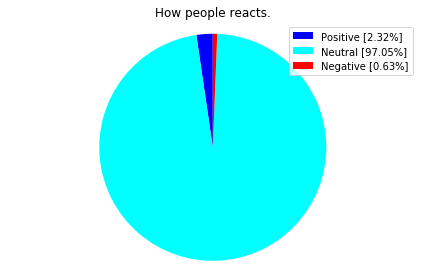

In [84]:
positive = 0
negative = 0
neutral = 0
polarity = 0

def calculatePercentage(a,b):
    return 100*float(a)/float(b)
opinion = []
for comment in analyse:
    translator.translate(comment, dest="fr").text
    myAnalysis=textblob.TextBlob(translator.translate(comment, dest="en").text)
    polarity += myAnalysis.sentiment.polarity
    if myAnalysis.sentiment.polarity ==0:
        neutral+=1
        opinion.append("Neutre")
    elif myAnalysis.sentiment.polarity > 0.00:
        positive+=1
        opinion.append("Positive")
    elif myAnalysis.sentiment.polarity < 0.00:
        negative+=1
        opinion.append("Negative")                               

positive=calculatePercentage(positive,len(analyse))
negative=calculatePercentage(negative,len(analyse))
neutral=calculatePercentage(neutral,len(analyse))

positive=format(positive,'.2f')
negative=format(negative,'.2f')
neutral=format(neutral,'.2f')

labels = ['Positive [' + str(positive) + '%]', 'Neutral [' + str(neutral) + '%]','Negative [' + str(negative) + '%]']
sizes=[positive,neutral,negative]
colors=['blue','cyan','red']
patches,texts=plt.pie(sizes,colors=colors,startangle=90)
plt.legend(patches,labels,loc="best")
plt.title('How people reacts.')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [65]:
analyse2=[]
#for i in range(len(df3)):
c=""
for j in range(len(df3['content'])):
    c+=" "+str(j)
    analyse2.append(df3.content[j])

In [79]:
analyse22=[]
for i in range(len(analyse2)):
    for j in range(len(analyse2[i])):
        analyse22.append(analyse2[i][j])

In [81]:
analyse22

['stb',
 'neo',
 'by',
 'stb',
 'transform',
 'banqu',
 'bijou',
 'architectural',
 'tunis',
 'pal',
 'baron',
 'erlang',
 'encor',
 'appel',
 'ennejm',
 'ezzahr',
 'tenu',
 'hi',
 'inaugur',
 'premier',
 'edit',
 'projet',
 'national',
 'baptis',
 'neo',
 'by',
 'stb',
 'transform',
 'banqu',
 'innov',
 'seul',
 'innov',
 'technolog',
 'abord',
 'managerial',
 'dit',
 'expert',
 'expert',
 'transform',
 'digital',
 'appel',
 'a',
 'reflexion',
 'profond',
 'collegial',
 'reun',
 'tous',
 'acteur',
 'ecosystem',
 'larg',
 'encor',
 'tre',
 'bien',
 'connu',
 'peu',
 'organis',
 'neoby',
 'stblabanqueexponentiel',
 'stbbank',
 'neotranslated',
 'from',
 'frenchjuly',
 'at',
 'pm',
 'stb',
 'bank',
 'a',
 'menzel',
 'temim',
 'plais',
 'inform',
 'sieg',
 'succursal',
 'menzel',
 'temim',
 'a',
 'demenag',
 'ancien',
 'sieg',
 'a',
 'adress',
 'suiv',
 'nahj',
 'munj',
 'selim',
 'manzil',
 'tamim',
 'attend',
 'termin',
 'nouveau',
 'look',
 'ancien',
 'sieg',
 'accueil',
 'meilleur',
 

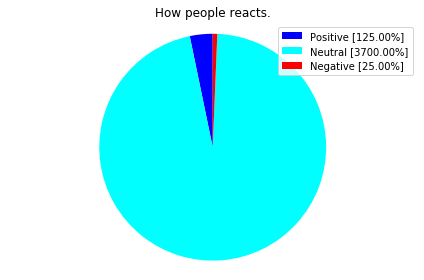

In [82]:
positive = 0
negative = 0
neutral = 0
polarity = 0

def calculatePercentage(a,b):
    return 100*float(a)/float(b)
opinion = []
for comment in analyse22:
    myAnalysis=textblob.TextBlob(translator.translate(comment, dest="en").text)
    polarity += myAnalysis.sentiment.polarity
    if myAnalysis.sentiment.polarity ==0:
        neutral+=1
        opinion.append("Neutre")
    elif myAnalysis.sentiment.polarity > 0.00:
        positive+=1
        opinion.append("Positive")
    elif myAnalysis.sentiment.polarity < 0.00:
        negative+=1
        opinion.append("Negative")

positive=calculatePercentage(positive,len(analyse2))
negative=calculatePercentage(negative,len(analyse2))
neutral=calculatePercentage(neutral,len(analyse2))

positive=format(positive,'.2f')
negative=format(negative,'.2f')
neutral=format(neutral,'.2f')

labels = ['Positive [' + str(positive) + '%]', 'Neutral [' + str(neutral) + '%]','Negative [' + str(negative) + '%]']
sizes=[positive,neutral,negative]
colors=['blue','cyan','red']
patches,texts=plt.pie(sizes,colors=colors,startangle=90)
plt.legend(patches,labels,loc="best")
plt.title('How people reacts.')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [67]:
df3

,content,comments,good,bad
0,"[plais, inform, sieg, succursal, ban, khallad,...","[[honnet], [inutilit, rembours, deux, mois, pr...",176,1
1,"[retour, video, even, neo, by, stb, juillet, p...","[[jeun, revenu, occas], [a, encor, mois], [die...",261,3
2,"[preserv, environ, responsabilit, tous, marg, ...","[[chang, tre, import, fondamental, observ, soc...",341,2
3,"[tant, startup, benefici, label, startup, mini...","[[cart, vis, stb, perdu, presenc], [seigneur],...",142,0
4,"[horair, ouvertur, guichet, lund, vendred, a, ...","[[dieu], [fait, report, vers, pret, dep, reven...",548,4
...,...,...,...,...
70,"[stb, bank, sponsor, officiel, trophe, femm, e...","[[stb, toujour, present], [bsar, a, ena, ab, n...",160,0
71,"[stb, bank, voi, succ, retour, video, salon, i...","[[barb, bash], [compt, bancair], [comment, tra...",102,0
72,"[banqu, tunisien, partenair, officiel, salon, ...","[[franch], [album, yass], [zaid, alash, a, tou...",283,0
73,"[interview, lotf, debbab, wmc]","[[bon, courag], [bravo, si, lotf, bon, continu...",341,1


In [977]:
stopwords.words('french')

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [79]:
dataframefinal=pd.read_csv('newdf2.csv')
dataframefinal

,Unnamed: 0,content,comments,good,bad
0,0,"[""Nous avons le plaisir de vous informer que l...","[""[«Honnetement, l'inutilite est de rembourser...",176,1
1,1,"[""Retour en video sur l'evenement Neo by STB ...","[""['Votre jeune est revenu sur l'occasion, il ...",261,3
2,2,"[""La preservation de notre environnement est d...","[""['Un changement tres important et fondamenta...",341,2
3,3,"[""En tant que startup beneficiant du Label Sta...","['[«Carte Visa Stb perdue en presence»', '""Par...",142,0
4,4,"[""Horaire d'ouverture des guichets du Lundi au...","['[""Par Dieu, le fait de reporter le versement...",548,4
...,...,...,...,...,...
70,70,"['STB BANK sponsor officiel des ""Trophees des ...","[""['La stb toujours presente'"", '«bsara7a ena ...",160,0
71,71,['Avec la STB BANK... sur la voie du succes R...,"[""['Barbie Bash, nous avons un compte bancaire...",102,0
72,72,['La Banque Tunisienne est partenaire officiel...,"[""Franchement, l'album de Yasser."", 'Et Zaid A...",283,0
73,73,['Interview de M.Lotfi Debbabi avec WMC'],"[""['Bon courage '"", ""'BRAVO si lotfi et bonne ...",341,1
